To analyze public sentiment towards a brand, product, or event using social media data, and generate
actionable insights for marketing and customer engagement strategies.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import textblob
import wordcloud

In [3]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df=pd.read_csv('advance stage\\task3resources\\sentimentdataset.csv',encoding='latin-1')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! ðª ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [15]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def clean_text(text):
 text = text.lower()
 text = re.sub(r"http\S+|www\S+", "", text)
 text = re.sub(r"[^a-zA-Z\s]", "", text)
 text = " ".join(word for word in text.split() if word not in stop_words)
 return text

df['clean_text'] = df['Text'].apply(clean_text)




Apply Sentiment Model (VADER)

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['score'] = df['clean_text'].apply(lambda x: 
sia.polarity_scores(x)['compound'])

Classify Sentiment

In [18]:
def classify(score):
 if score >= 0.05:
    return "Positive"
 elif score <= -0.05:
    return "Negative"
 else:
    return "Neutral"
df['Sentiment'] = df['score'].apply(classify)

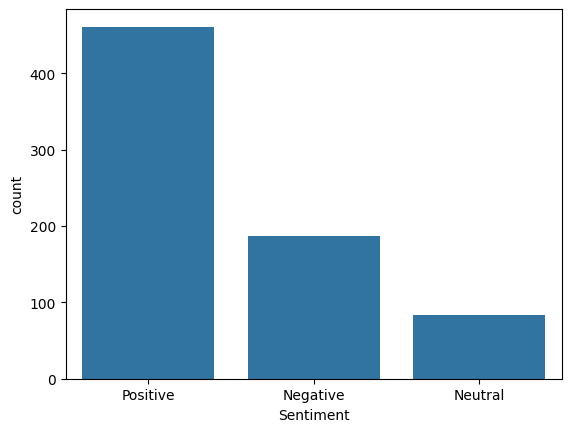

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df, x='Sentiment')
plt.show()

generating wordcloud

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

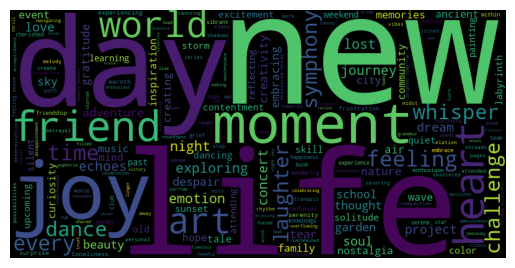

In [20]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400).generate(" ".join(df['clean_text']))
plt.imshow(wc)
plt.axis("off")